# Proyek Analisis Data: [Proyek Data Analisis Dicoding]
- **Nama:** [Alexis Ronauli Manurung]
- **Email:** [alexisronauli@gmail.com]
- **ID Dicoding:** [alexis_ronauli]

## Menentukan Pertanyaan Bisnis

1. Produk apa yang terjual banyak dan sedikit?
2. Negara mana yang memiliki pembelian produk terbanyak?

## Import Semua Packages/Library yang Digunakan

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


## Data Wrangling

### Gathering Data

In [38]:
customers_df = pd.read_csv("/content/drive/MyDrive/data/customers_dataset.csv")
customers_df.head()

geolocation_df = pd.read_csv("/content/drive/MyDrive/data/geolocation_dataset.csv")
geolocation_df.head()

order_items_df = pd.read_csv("/content/drive/MyDrive/data/order_items_dataset.csv")
order_items_df.head()

order_payments_df = pd.read_csv("/content/drive/MyDrive/data/order_payments_dataset.csv")
order_payments_df.head()

order_reviews_df = pd.read_csv("/content/drive/MyDrive/data/order_reviews_dataset.csv")
order_reviews_df.head()

orders_df = pd.read_csv("/content/drive/MyDrive/data/orders_dataset.csv")
orders_df.head()

sellers_df = pd.read_csv("/content/drive/MyDrive/data/sellers_dataset.csv")
sellers_df.head()

product_category_name_translation_df = pd.read_csv("/content/drive/MyDrive/data/product_category_name_translation.csv")
product_category_name_translation_df.head()

products_df = pd.read_csv("/content/drive/MyDrive/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**

Pada tahap ini, saya membaca dan menampilkan beberapa dataset terkait pelanggan, pesanan, ulasan, pembayaran, dan produk menggunakan `pandas`. Langkah ini bertujuan untuk eksplorasi awal guna memahami struktur dan kualitas data sebelum melakukan pembersihan dan analisis lebih lanjut.

### Assessing Data

In [39]:
def periksa_data(df, nama):
    print(f"--- {nama} ---")
    print(df.head())
    print(df.info())

    print("\nNilai yang hilang:")
    print(df.isna().sum())

    print(f"\nNilai duplikat: {df.duplicated().sum()}")
    print("\n" + "-"*50 + "\n")

pelanggan_data = pd.read_csv("/content/drive/MyDrive/data/customers_dataset.csv")
periksa_data(pelanggan_data, "Data Pelanggan")

geolokasi_data = pd.read_csv("/content/drive/MyDrive/data/geolocation_dataset.csv")
periksa_data(geolokasi_data, "Data Geolokasi")

barang_pesanan_data = pd.read_csv("/content/drive/MyDrive/data/order_items_dataset.csv")
periksa_data(barang_pesanan_data, "Data Barang Pesanan")

pembayaran_pesanan_data = pd.read_csv("/content/drive/MyDrive/data/order_payments_dataset.csv")
periksa_data(pembayaran_pesanan_data, "Data Pembayaran Pesanan")

ulasan_pesanan_data = pd.read_csv("/content/drive/MyDrive/data/order_reviews_dataset.csv")
periksa_data(ulasan_pesanan_data, "Data Ulasan Pesanan")

pesanan_data = pd.read_csv("/content/drive/MyDrive/data/orders_dataset.csv")
periksa_data(pesanan_data, "Data Pesanan")

penjual_data = pd.read_csv("/content/drive/MyDrive/data/sellers_dataset.csv")
periksa_data(penjual_data, "Data Penjual")

terjemahan_kategori_produk_data = pd.read_csv("/content/drive/MyDrive/data/product_category_name_translation.csv")
periksa_data(terjemahan_kategori_produk_data, "Data Terjemahan Nama Kategori Produk")

produk_data = pd.read_csv("/content/drive/MyDrive/data/products_dataset.csv")
periksa_data(produk_data, "Data Produk")

--- Data Pelanggan ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column           

**Insight:**

Pada tahap ini, saya melakukan pemeriksaan awal pada dataset untuk memahami struktur data, mencari nilai yang hilang, dan mendeteksi duplikat. Langkah ini penting untuk memastikan data bersih dan siap untuk dianalisis lebih lanjut.

### Cleaning Data

In [40]:
def bersihkan_data(df, drop_duplicates=False, drop_na=False, convert_datetime_columns=None):
    if drop_duplicates:
        df.drop_duplicates(inplace=True)

    if drop_na:
        df.dropna(inplace=True)

    if convert_datetime_columns:
        for column in convert_datetime_columns:
            df[column] = pd.to_datetime(df[column])

    return df

pelanggan_data = pd.read_csv("/content/drive/MyDrive/data/customers_dataset.csv")

geolokasi_data = pd.read_csv("/content/drive/MyDrive/data/geolocation_dataset.csv")
geolokasi_data = bersihkan_data(geolokasi_data, drop_duplicates=True)

barang_pesanan_data = pd.read_csv("/content/drive/MyDrive/data/order_items_dataset.csv")

pembayaran_pesanan_data = pd.read_csv("/content/drive/MyDrive/data/order_payments_dataset.csv")

ulasan_pesanan_data = pd.read_csv("/content/drive/MyDrive/data/order_reviews_dataset.csv")

pesanan_data = pd.read_csv("/content/drive/MyDrive/data/orders_dataset.csv")
kolom_waktu = [
    "order_purchase_timestamp", "order_approved_at",
    "order_delivered_carrier_date", "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
pesanan_data = bersihkan_data(pesanan_data, convert_datetime_columns=kolom_waktu)

penjual_data = pd.read_csv("/content/drive/MyDrive/data/sellers_dataset.csv")

terjemahan_kategori_produk_data = pd.read_csv("/content/drive/MyDrive/data/product_category_name_translation.csv")

produk_data = pd.read_csv("/content/drive/MyDrive/data/products_dataset.csv")
produk_data = bersihkan_data(produk_data, drop_na=True)

**Insight:**

Pada tahap ini, saya melakukan pembersihan data untuk memastikan kualitas dataset sebelum dianalisis lebih lanjut. Langkah-langkah pembersihan meliputi penghapusan duplikat pada data geolokasi, konversi kolom waktu pada data pesanan, dan penghapusan nilai yang hilang pada data produk. Pembersihan ini penting untuk meningkatkan akurasi hasil analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

Produk yang Paling Banyak Terjual:
         product_category  total_sales  total_revenue
7          bed_bath_table         9894      898172.60
43          health_beauty         8721     1128712.09
65         sports_leisure         7597      866135.21
39        furniture_decor         7430      654597.92
15  computers_accessories         6726      764369.51

Produk yang Paling Sedikit Terjual:
                     product_category  total_sales  total_revenue
41  furniture_mattress_and_upholstery           15        2108.09
11                  cds_dvds_musicals           14         730.00
52                         la_cuisine           11        1813.99
29          fashion_childrens_clothes            8         569.85
61              security_and_services            1         100.00


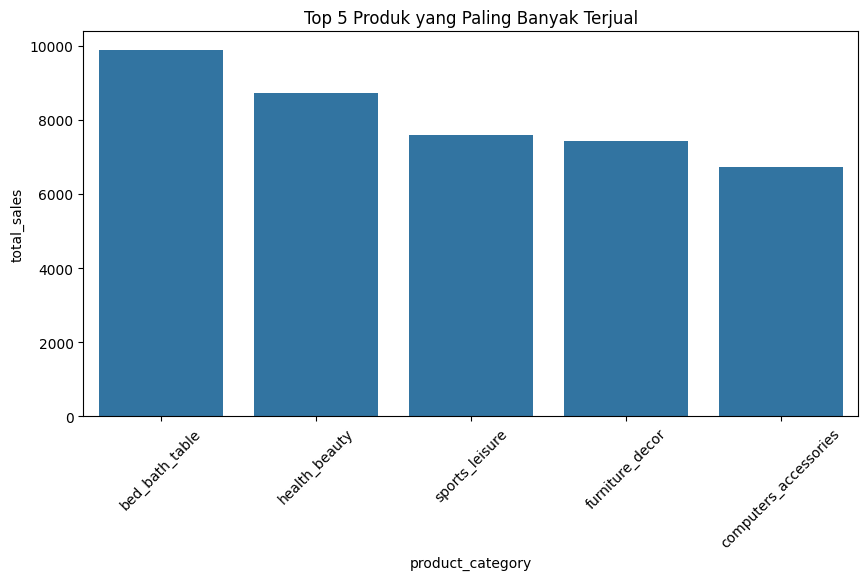

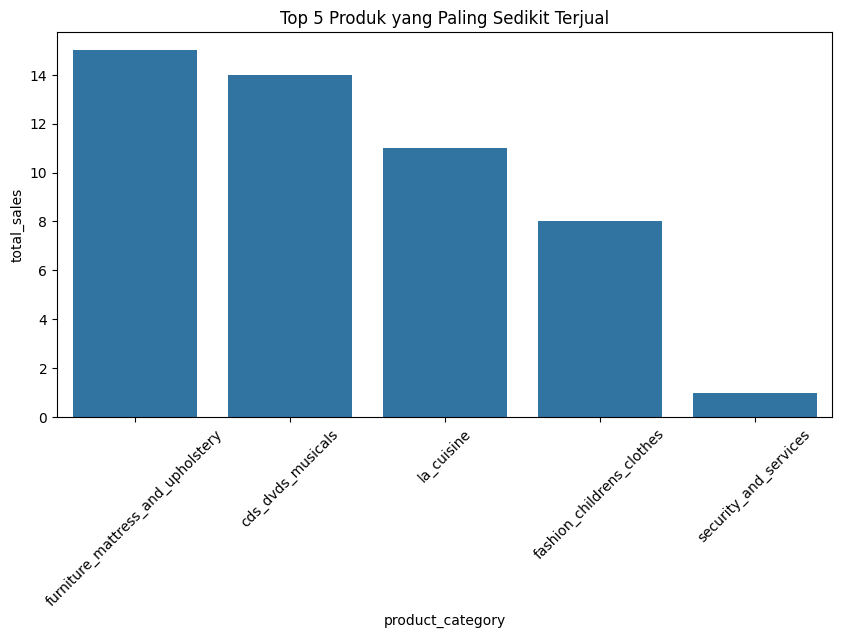

Negara (State) dengan Pembelian Terbanyak:
   customer_state  total_orders
25             SP         41746
18             RJ         12852
10             MG         11635
22             RS          5466
17             PR          5045


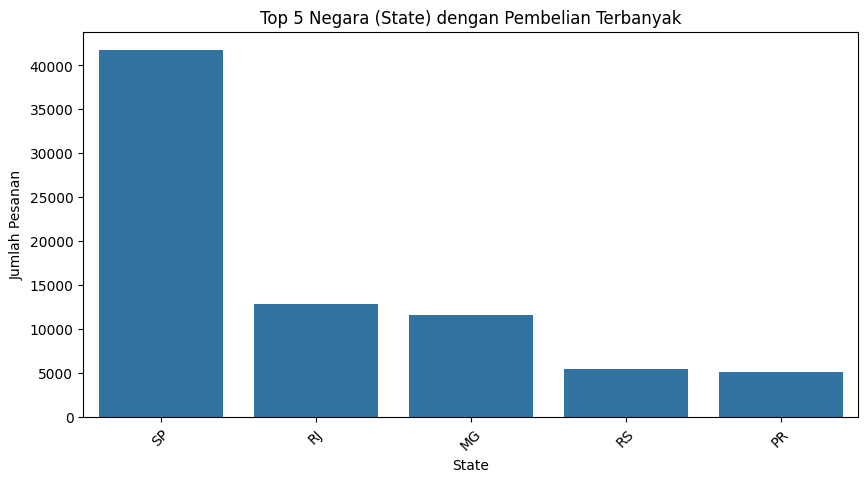

Main dataset berhasil diekspor ke '/content/drive/MyDrive/data/main_data.csv'


In [41]:
customers_df = pd.read_csv("/content/drive/MyDrive/data/customers_dataset.csv")
orders_df = pd.read_csv("/content/drive/MyDrive/data/orders_dataset.csv")
order_items_df = pd.read_csv("/content/drive/MyDrive/data/order_items_dataset.csv")
products_df = pd.read_csv("/content/drive/MyDrive/data/products_dataset.csv")
product_category_name_translation = pd.read_csv("/content/drive/MyDrive/data/product_category_name_translation.csv")

# Mengubah kolom waktu menjadi format datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

products_df = pd.merge(
    left=products_df,
    right=product_category_name_translation,
    how="left",
    on="product_category_name",
)

# == Pertanyaan 1: Produk Apa yang Banyak dan Sedikit Terjual? ==
# Menggabungkan order_items dan products untuk mendapatkan informasi tentang produk yang terjual
order_items_with_product_data_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    on="product_id"
)

product_sales_summary_df = order_items_with_product_data_df.groupby('product_category_name_english').agg({
    'order_item_id': 'count',
    'price': 'sum'
}).reset_index()

product_sales_summary_df.columns = ['product_category', 'total_sales', 'total_revenue']
product_sales_summary_df = product_sales_summary_df.sort_values(by='total_sales', ascending=False)

print("Produk yang Paling Banyak Terjual:")
print(product_sales_summary_df.head(5))

print("\nProduk yang Paling Sedikit Terjual:")
print(product_sales_summary_df.tail(5))

plt.figure(figsize=(10, 5))
sns.barplot(data=product_sales_summary_df.head(5), x='product_category', y='total_sales')
plt.title("Top 5 Produk yang Paling Banyak Terjual")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=product_sales_summary_df.tail(5), x='product_category', y='total_sales')
plt.title("Top 5 Produk yang Paling Sedikit Terjual")
plt.xticks(rotation=45)
plt.show()

# == Pertanyaan 2: Negara (State) Terbanyak yang Membeli Produk ==
# Menggabungkan orders dan customers untuk melihat state terbanyak dalam pembelian produk
orders_with_customer_state_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    on="customer_id"
)

state_sales_summary_df = orders_with_customer_state_df.groupby('customer_state').agg({
    'order_id': 'count'
}).reset_index()

state_sales_summary_df.columns = ['customer_state', 'total_orders']
state_sales_summary_df = state_sales_summary_df.sort_values(by='total_orders', ascending=False)

print("Negara (State) dengan Pembelian Terbanyak:")
print(state_sales_summary_df.head(5))

plt.figure(figsize=(10, 5))
sns.barplot(data=state_sales_summary_df.head(5), x='customer_state', y='total_orders')
plt.title("Top 5 Negara (State) dengan Pembelian Terbanyak")
plt.xlabel("State")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

# == Menyimpan Semua Data yang Telah Dieksplorasi ke CSV ==
# Menggabungkan data order_items, orders, dan customers menjadi satu main dataset
main_data_df = pd.merge(
    left=order_items_with_product_data_df,
    right=orders_with_customer_state_df,
    how="left",
    on="order_id"
)

# Mengekspor dataset utama ke CSV
main_data_df.to_csv("/content/drive/MyDrive/data/main_data.csv", index=False)
print("Main dataset berhasil diekspor ke '/content/drive/MyDrive/data/main_data.csv'")

**Insight:**

- Pada tahap ini, saya melakukan analisis penjualan produk dan pembelian berdasarkan negara bagian (state).
- Saya menggabungkan beberapa dataset untuk mendapatkan informasi penting. Langkah pertama adalah mengonversi kolom waktu menjadi format datetime, diikuti dengan analisis produk yang paling banyak dan paling sedikit terjual menggunakan pengelompokan kategori produk. Selanjutnya, saya menganalisis negara bagian yang memiliki jumlah pembelian terbanyak.
- Hasil analisis divisualisasikan dengan grafik bar, dan semua data yang telah dieksplorasi diekspor ke CSV untuk dokumentasi lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-42-b0c2887c359c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_sold, x='product_category', y='total_sales', palette='Blues_d')


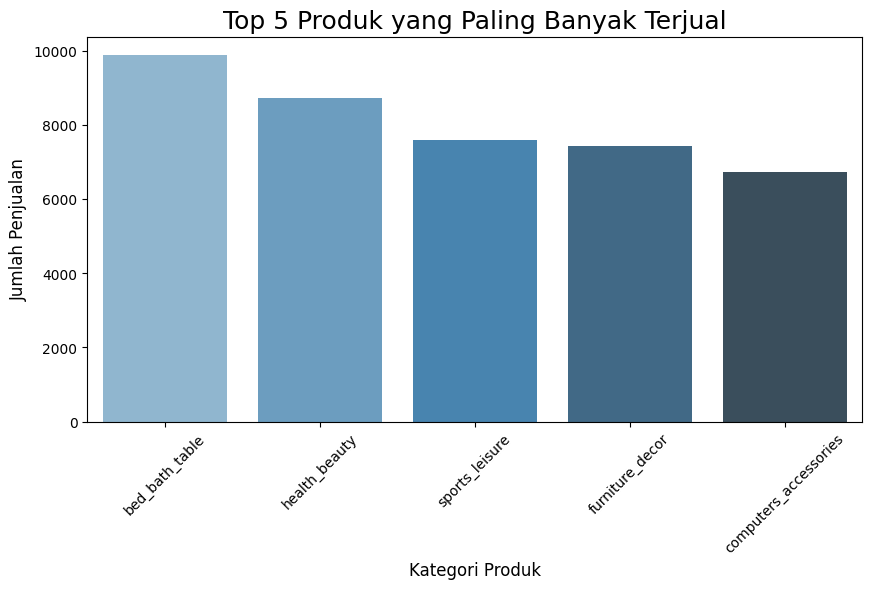

<ipython-input-42-b0c2887c359c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_sold, x='product_category', y='total_sales', palette='Oranges_d')


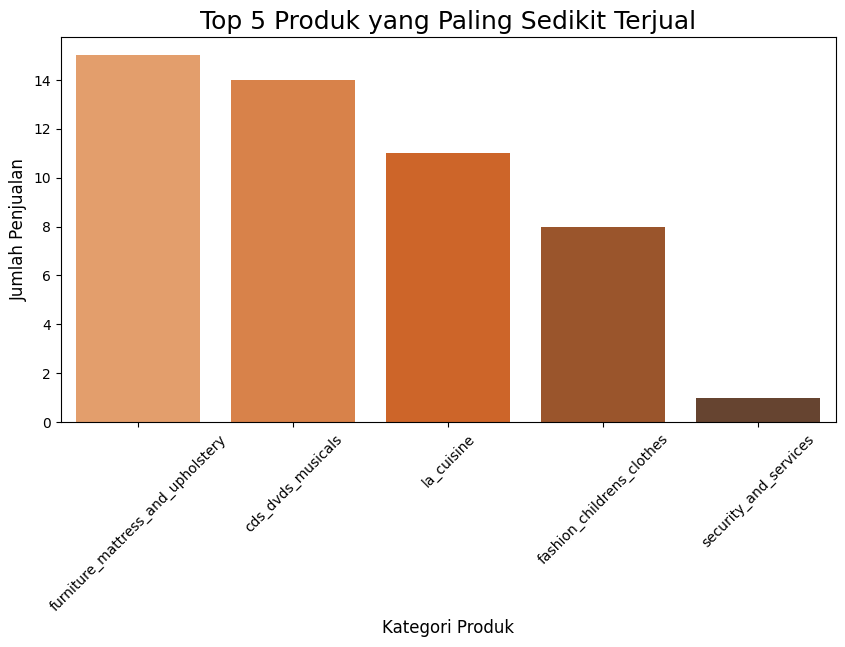

<ipython-input-42-b0c2887c359c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_sold, x='product_category', y='total_revenue', palette='Greens_d')


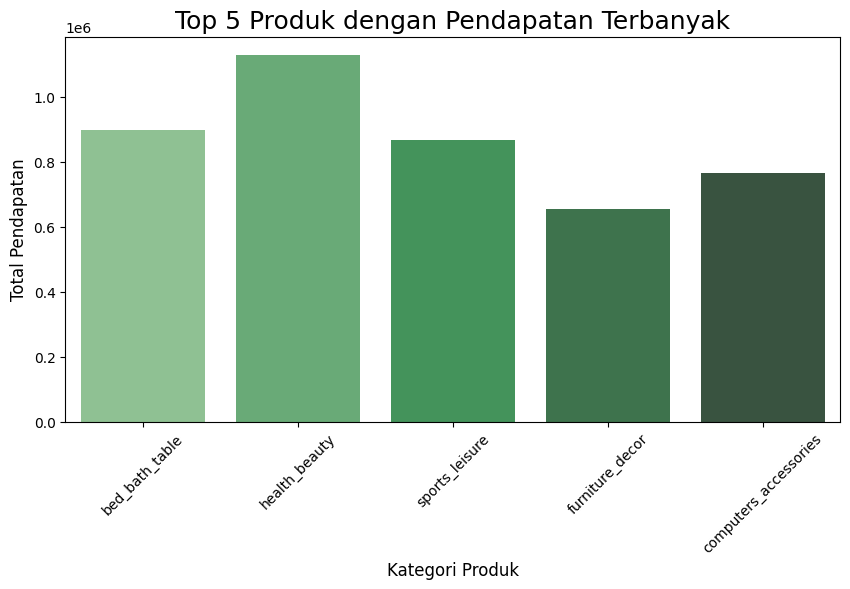

In [42]:
main_data_df = pd.read_csv("/content/drive/MyDrive/data/main_data.csv")

main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'])

product_sales_df = main_data_df.groupby('product_category_name_english').agg({
    'order_item_id': 'count',
    'price': 'sum'
}).reset_index()

product_sales_df.columns = ['product_category', 'total_sales', 'total_revenue']
product_sales_df = product_sales_df.sort_values(by='total_sales', ascending=False)

most_sold = product_sales_df.head(5)
least_sold = product_sales_df.tail(5)

plt.figure(figsize=(10, 5))
sns.barplot(data=most_sold, x='product_category', y='total_sales', palette='Blues_d')
plt.title("Top 5 Produk yang Paling Banyak Terjual", fontsize=18)
plt.xlabel("Kategori Produk", fontsize=12)
plt.ylabel("Jumlah Penjualan", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=least_sold, x='product_category', y='total_sales', palette='Oranges_d')
plt.title("Top 5 Produk yang Paling Sedikit Terjual", fontsize=18)
plt.xlabel("Kategori Produk", fontsize=12)
plt.ylabel("Jumlah Penjualan", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=most_sold, x='product_category', y='total_revenue', palette='Greens_d')
plt.title("Top 5 Produk dengan Pendapatan Terbanyak", fontsize=18)
plt.xlabel("Kategori Produk", fontsize=12)
plt.ylabel("Total Pendapatan", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

<ipython-input-44-499103201586>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states_by_orders, x='customer_state', y='order_id', palette='Blues_d')


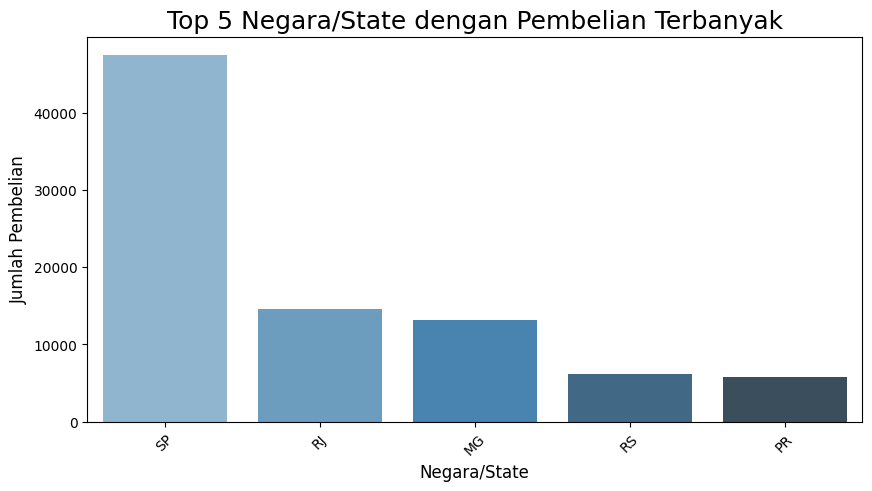

<ipython-input-44-499103201586>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states_by_revenue, x='customer_state', y='total_revenue', palette='Greens_d')


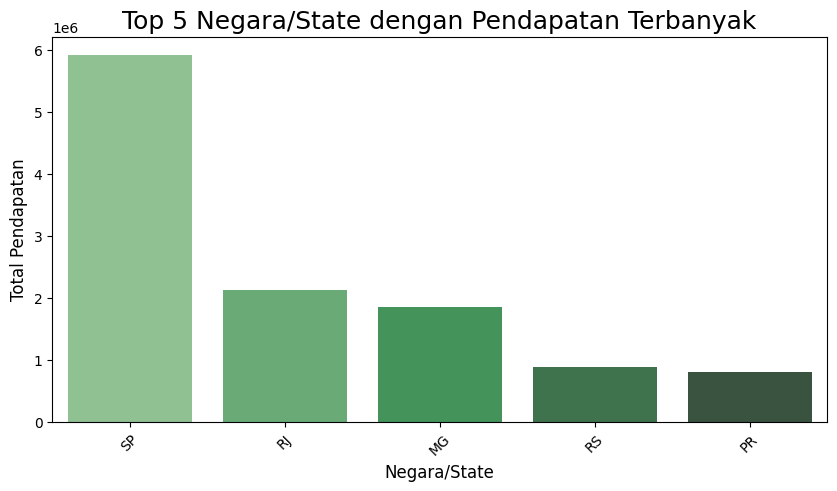

<ipython-input-44-499103201586>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales_df, x='customer_state', y='order_id', palette='Purples_d')


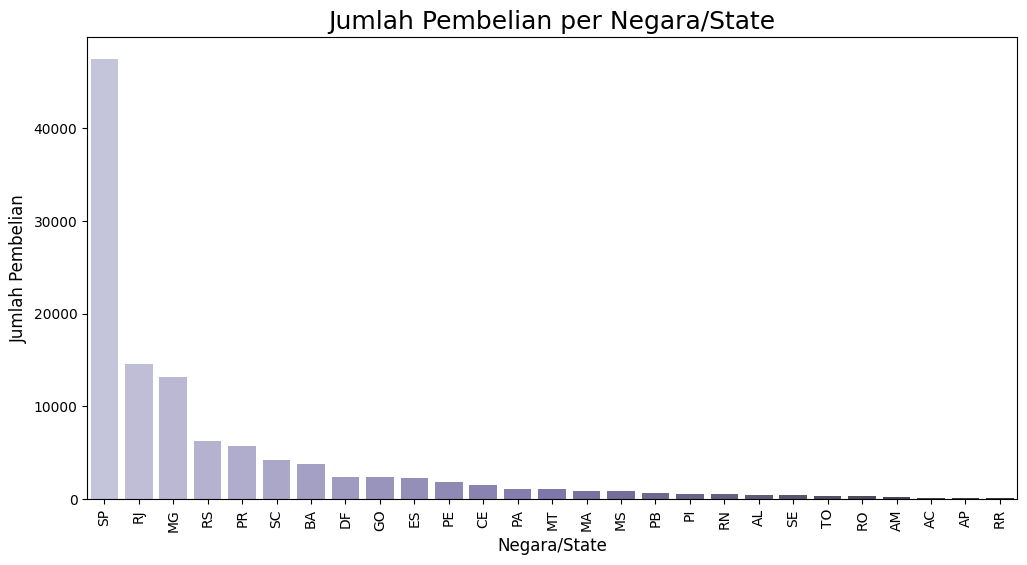

In [44]:
main_data_df = pd.read_csv("/content/drive/MyDrive/data/main_data.csv")

main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'])

if 'customer_state' not in main_data_df.columns:
    print(f"Column 'customer_state' not found. Did you mean one of these?\n{main_data_df.columns[main_data_df.columns.str.contains('state', case=False)]}")
else:
    state_sales_df = main_data_df.groupby('customer_state').agg({
        'order_id': 'count',
        'price': 'sum',
        'freight_value': 'sum'
    }).reset_index()

    state_sales_df['total_revenue'] = state_sales_df['price'] + state_sales_df['freight_value']
    state_sales_df = state_sales_df.sort_values(by='order_id', ascending=False)

    top_states_by_orders = state_sales_df.head(5)
    top_states_by_revenue = state_sales_df.sort_values(by='total_revenue', ascending=False).head(5)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_states_by_orders, x='customer_state', y='order_id', palette='Blues_d')
    plt.title("Top 5 Negara/State dengan Pembelian Terbanyak", fontsize=18)
    plt.xlabel("Negara/State", fontsize=12)
    plt.ylabel("Jumlah Pembelian", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_states_by_revenue, x='customer_state', y='total_revenue', palette='Greens_d')
    plt.title("Top 5 Negara/State dengan Pendapatan Terbanyak", fontsize=18)
    plt.xlabel("Negara/State", fontsize=12)
    plt.ylabel("Total Pendapatan", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=state_sales_df, x='customer_state', y='order_id', palette='Purples_d')
    plt.title("Jumlah Pembelian per Negara/State", fontsize=18)
    plt.xlabel("Negara/State", fontsize=12)
    plt.ylabel("Jumlah Pembelian", fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

**Insight:**
- Pada pertanyaan pertama :
Saya melakukan analisis terhadap kategori produk yang paling banyak dan paling sedikit terjual, serta produk dengan pendapatan tertinggi. Saya mengelompokkan data berdasarkan kategori produk, menghitung total penjualan dan pendapatan, lalu memvisualisasikannya dengan grafik bar. Hasilnya menunjukkan produk-produk terlaris, produk dengan penjualan terendah, dan produk yang menghasilkan pendapatan tertinggi, yang memberikan gambaran penting mengenai performa kategori produk di pasar.

- Pada pertanyaan kedua:
Saya melakukan analisis berdasarkan negara bagian (state) untuk melihat jumlah pembelian dan total pendapatan. Data dikelompokkan berdasarkan negara bagian, dengan menghitung total pembelian, harga, dan biaya pengiriman. Visualisasi dilakukan untuk menampilkan negara bagian dengan jumlah pembelian terbanyak dan pendapatan tertinggi, serta distribusi pembelian di setiap negara bagian. Analisis ini memberikan wawasan mengenai wilayah dengan performa penjualan terbaik.

## Analisis Lanjutan (Opsional)

Hasil RFM Analysis:
                        customer_id  recency  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703      292          1    114.74
1  000161a058600d5901f007fab4c27140      413          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      551          1    195.42
3  0002414f95344307404f0ace7a26f1d5      382          1    179.35
4  000379cdec625522490c315e70c7a9fb      153          1    107.01
Pelanggan dengan RFM Score Terbaik:
                            customer_id  recency  frequency  monetary R_score  \
77422  c821a8b90c1d0df109200a6ca4926eb9      108          1    356.16       4   
86448  dfde39418d518e2313768cb54f9673a6       31          1    297.71       4   
91948  ee219ef2bc1886c1847f43a3e201fb0b       92          1    661.10       4   
86429  dfd081b5b9924847379085046ea374e9       39          1    410.13       4   
79341  cd1437f95cf93146c0fdacd572480dd1       68          1    187.98       4   

      F_score M_score RFM_Score  
77422       4       4      

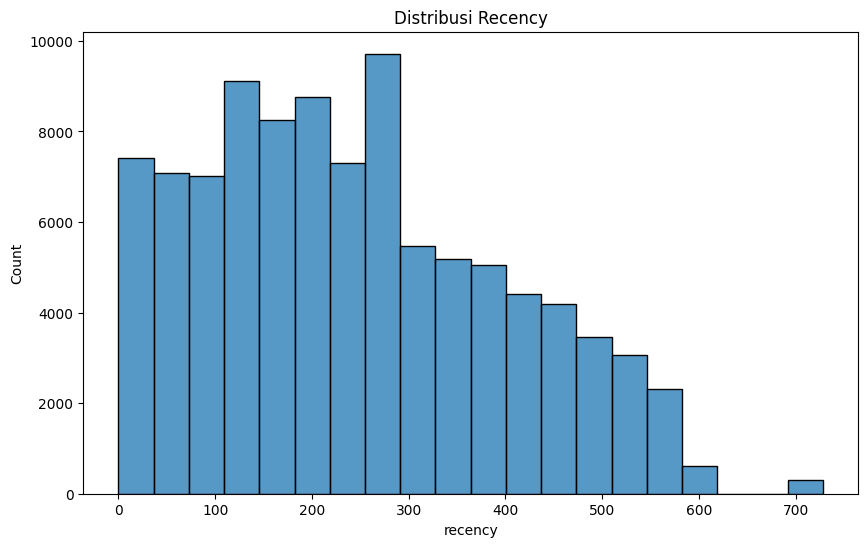

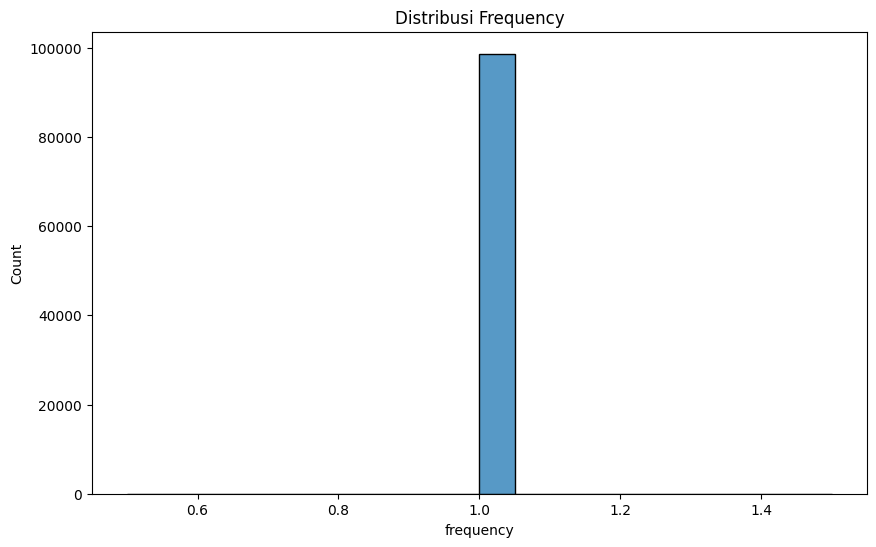

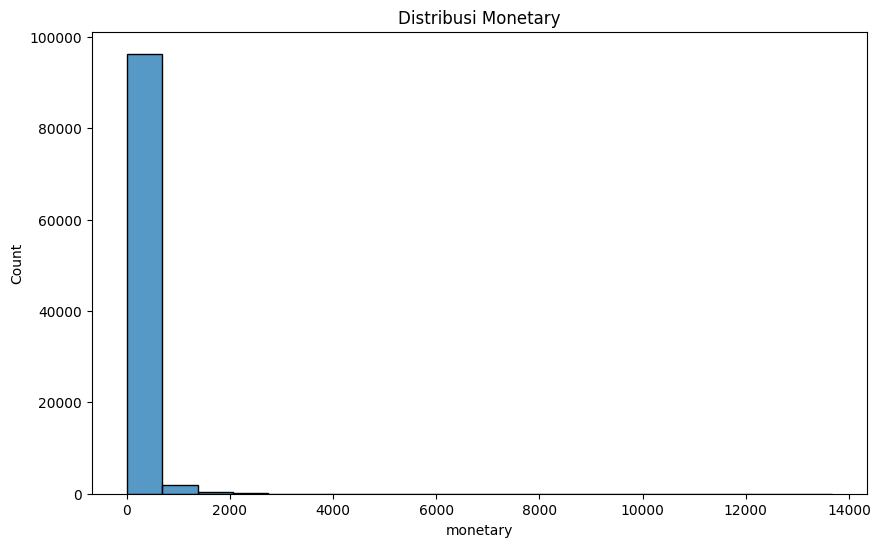

Hasil RFM Analysis berhasil diekspor ke '/content/drive/MyDrive/data/rfm_analysis.csv'


In [43]:
main_data_df = pd.read_csv("/content/drive/MyDrive/data/main_data.csv")

# Mengubah kolom waktu menjadi format datetime
main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'])

# Menghitung nilai RFM
# 1. Recency: Menghitung jumlah hari sejak transaksi terakhir
snapshot_date = main_data_df['order_purchase_timestamp'].max()  # Mengambil tanggal transaksi terbaru
main_data_df['recency'] = (snapshot_date - main_data_df['order_purchase_timestamp']).dt.days

# 2. Frequency: Menghitung jumlah pesanan yang dilakukan oleh setiap pelanggan
frequency_df = main_data_df.groupby('customer_id').agg({
    'order_id': 'nunique'
}).reset_index()
frequency_df.columns = ['customer_id', 'frequency']

# 3. Monetary: Menghitung total uang yang dihabiskan oleh setiap pelanggan (harga produk + biaya pengiriman)
monetary_df = main_data_df.groupby('customer_id').agg({
    'price': 'sum',
    'freight_value': 'sum'
}).reset_index()

monetary_df['monetary'] = monetary_df['price'] + monetary_df['freight_value']
monetary_df = monetary_df[['customer_id', 'monetary']]

# Menggabungkan nilai Recency, Frequency, dan Monetary ke dalam satu dataframe
rfm_df = main_data_df.groupby('customer_id').agg({
    'recency': 'min'
}).reset_index()

rfm_df = pd.merge(rfm_df, frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# Menampilkan hasil RFM
print("Hasil RFM Analysis:")
print(rfm_df.head())

# Membagi skor RFM menjadi 4 segmen berdasarkan kuartil
rfm_df['R_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_score'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])

# Menggabungkan RFM score menjadi satu kolom
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Menampilkan pelanggan dengan RFM score terbaik
print("Pelanggan dengan RFM Score Terbaik:")
print(rfm_df.sort_values('RFM_Score', ascending=False).head())

# == Visualisasi Distribusi RFM ==
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['recency'], kde=False, bins=20)
plt.title('Distribusi Recency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['frequency'], kde=False, bins=20)
plt.title('Distribusi Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['monetary'], kde=False, bins=20)
plt.title('Distribusi Monetary')
plt.show()

# Menyimpan Hasil RFM Analysis ke CSV
rfm_df.to_csv("/content/drive/MyDrive/data/rfm_analysis.csv", index=False)
print("Hasil RFM Analysis berhasil diekspor ke '/content/drive/MyDrive/data/rfm_analysis.csv'")

**Insight**:

Pada tahap ini, saya melakukan analisis RFM untuk mengukur nilai pelanggan. Recency dihitung berdasarkan jumlah hari sejak transaksi terakhir, Frequency dihitung dari jumlah pesanan per pelanggan, dan Monetary adalah total pengeluaran (harga produk + biaya pengiriman). Setelah menghitung nilai RFM, pelanggan dikelompokkan ke dalam segmen berdasarkan kuartil, dan RFM Score dihitung untuk mengidentifikasi pelanggan dengan nilai tertinggi. Hasilnya divisualisasikan melalui distribusi RFM dan disimpan dalam CSV untuk keperluan analisis lebih lanjut.

## Conclusion

- Conclution pertanyaan 1

Produk yang Paling Banyak Terjual:
Kategori produk "bed_bath_table" merupakan produk yang paling banyak terjual, dengan jumlah penjualan mendekati 10.000 unit. Ini menunjukkan bahwa kategori ini sangat populer di kalangan pelanggan.
Produk lain seperti health_beauty, sports_leisure, furniture_decor, dan computers_accessories juga memiliki penjualan yang tinggi, menunjukkan bahwa kategori-kategori ini termasuk produk-produk yang banyak diminati oleh konsumen.

Produk yang Paling Sedikit Terjual:
Produk dalam kategori seperti furniture_mattress_and_upholstery, cds_dvds_musicals, la_cuisine, fashion_childrens_clothes, dan security_and_services memiliki penjualan yang sangat rendah (sekitar 10-15 unit).
Ini bisa menunjukkan bahwa produk dalam kategori ini memiliki daya tarik yang rendah atau mungkin tidak dipromosikan dengan cukup baik.

Produk dengan Pendapatan Terbanyak:
Kategori "health_beauty" adalah produk dengan pendapatan tertinggi, mendekati 1.000.000, diikuti oleh bed_bath_table. Meskipun penjualan tinggi, pendapatan yang besar juga dapat menunjukkan harga rata-rata yang lebih tinggi di kategori ini.
Kategori "computers_accessories" memiliki pendapatan yang signifikan, meskipun tidak memiliki jumlah penjualan yang sebesar kategori lain, yang juga dapat disebabkan oleh harga unit yang lebih tinggi.

- Conclution pertanyaan 2

Negara/State Terbanyak yang Membeli Produk:
State "SP" mendominasi pembelian dengan lebih dari 40.000 pesanan, jauh di atas negara bagian lain seperti RJ, MG, RS, dan PR.
Negara bagian seperti RS dan PR juga berada di urutan lima besar, namun pembeliannya jauh lebih rendah dibandingkan SP.

Negara dengan Pendapatan Tertinggi:
State "SP" juga mendominasi dalam hal pendapatan dengan total lebih dari 6 juta, disusul oleh RJ dan MG dengan selisih yang signifikan.
Ini menunjukkan bahwa sebagian besar penjualan dan pendapatan perusahaan datang dari negara bagian SP.
Distribusi Jumlah Pembelian per Negara/State:

Visualisasi ini menunjukkan bahwa pembelian didominasi oleh beberapa negara bagian utama seperti SP, sementara negara-negara lain memiliki jumlah pembelian yang sangat kecil.

- RFM

Distribusi Recency:
Sebagian besar pelanggan melakukan pembelian terakhirnya sekitar 100-300 hari yang lalu. Semakin jauh ke kanan pada grafik (lebih dari 400 hari), semakin sedikit jumlah pelanggan, menunjukkan bahwa sebagian besar pelanggan masih relatif aktif dalam melakukan pembelian.

Distribusi Frequency:
Grafik distribusi frekuensi menunjukkan bahwa sebagian besar pelanggan hanya melakukan 1 pembelian. Ini menunjukkan bahwa banyak pelanggan hanya berbelanja sekali, dan ada peluang untuk meningkatkan loyalitas pelanggan dengan strategi retensi.

Distribusi Monetary:
Sebagian besar pelanggan memiliki nilai total pembelian yang rendah, dengan sebagian besar pelanggan membelanjakan di bawah 1000. Hanya sedikit pelanggan yang menghabiskan lebih dari itu, sehingga ada potensi untuk menargetkan pelanggan dengan nilai pembelian yang lebih tinggi.